Windows
D:\git\cardio\venv\Scripts\python.exe
C:\Users\1720267\Anaconda3\python.exe


In [2]:
# imports, setup and personal settings
from __future__ import print_function
import logging
import os
import importlib
# change working directory to project root
import platform
if platform.system() is "Windows":
    os.chdir('D:\\git\\cardio')
else:
    os.chdir('/Users/minority/Code/Git/cardio')
print(os.getcwd())
from src.utils.utils_io import Console_and_file_logger
Console_and_file_logger('SITK_stack_OSX')
logger = logging.getLogger()
logger.setLevel(logging.INFO)


# change working directory to project root
import platform
if platform.system() is "Windows":
    os.chdir('D:\\git\\cardio')
else:
    os.chdir('/Users/minority/Code/Git/cardio')
print(os.getcwd())

# change window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# enable jupiter features
import IPython.core.debugger as debugger
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', aspect='equal')
# enable inline plotting
%matplotlib inline
import SimpleITK as sitk

from distutils.version import LooseVersion
import sys
print(sys.version)
print(sys.version_info)

# project related helper functions
from src.utils.file_wrapper.app.Files import Dicomfile
from src.utils.file_wrapper.app.IO import FileWalker
from src.utils.myshow import myshow, myshow3d
from src.utils.utils_io import __ensure_dir__,__save_plot__

# for detailed debug infos
#Console_and_file_logger('ipython_sitk_stack')

# toggle detailed print messages
DETAILED_DEBUG = False

# check that all neccessary packages are installed (see requirements.txt file)
required_packages = {
    'jupyter', 'numpy', 'matplotlib', 'ipywidgets', 'scipy', 'pandas',
    'SimpleITK'
}

problem_packages = list()
# Iterate over the required packages: If the package is not installed
# ignore the exception.
for package in required_packages:
    try:
        p = importlib.import_module(package)
    except ImportError:
        problem_packages.append(package)

if len(problem_packages) is 0:
    print('All is well.')
else:
    print('The following packages are required but not installed: ' \
          + ', '.join(problem_packages))

/Users/minority/Code/Git/cardio


2018-12-01 11:04:40,620 INFO -------------------- Start --------------------
2018-12-01 11:04:40,621 INFO Filename: SITK_stack_OSX
2018-12-01 11:04:40,622 INFO Log directory: ./logs/


Working directory: /Users/minority/Code/Git/cardio.
Log dir: ./logs/
/Users/minority/Code/Git/cardio


3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)


/Users/minority/Code/Git/cardio/src/utils/file_wrapper/app/Files.py:4: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('TkAgg')


All is well.


2018-12-01 11:04:42,772 ERROR Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x10f1ecf28>)
Traceback (most recent call last):
  File "/Users/minority/Code/Git/cardio/venv/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/minority/Code/Git/cardio/venv/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/minority/Code/Git/cardio/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 295, in advance_eventloop
    eventloop(self)
TypeError: 'NoneType' object is not callable


In [55]:
class MyDicomfile(Dicomfile):


    def action(self):
        logging.debug('action performed')
        return self
    
    def get_origin(self):
        origin = self.sitk_img.GetOrigin()
        #print(origin)
        return origin
    
    def merge(self, a, b):
        if isinstance(a, list):
            a.append(b)
        else:
            a = []
            a.append(b)
        return a

In [24]:
src1 = 'data/testing/0001_small/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062857'
src2 = 'data/testing/0001_small/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062911'
dest = 'data/processed/small/test1'


# get all pictures of two studies
fw1 = FileWalker(MyDicomfile, src_dir=src1, dest_dir=dest)
fw2 = FileWalker(MyDicomfile, src_dir=src2, dest_dir=dest)

#print(fw1.open_files[0].stats)

#fw.log_stats()

2018-10-19 16:24:59,453 INFO Current src directory: data/raw/0001_small/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062857
2018-10-19 16:24:59,457 INFO Current dest directory: data/processed/small/test1
2018-10-19 16:24:59,459 DEBUG dicomfile init
2018-10-19 16:24:59,459 DEBUG Trying to open: data/raw/0001_small/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062857/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062853.dcm
2018-10-19 16:24:59,464 INFO action performed
2018-10-19 16:24:59,465 DEBUG dicomfile init
2018-10-19 16:24:59,466 DEBUG Trying to open: data/raw/0001_small/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062857/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062847.dcm
2018-10-19 16:24:59,471 INFO action performed
2018-10-19 16:24:59,472 DEBUG dicomfile init
2018-10-19 16:24:59,473 DEBUG Trying to open: data/raw/0001_small/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062857/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062844.dcm
2018-10-19 16:24:59

In [4]:
#select the first two pictures of each serie
# same timestep, but different slices
img1 = fw1.open_files[0].sitk_img
img2 = fw2.open_files[0].sitk_img

# show both slices
myshow3d(img1)
myshow3d(img2)

# get the numpy array out of an dcm file
img1_nda = sitk.GetArrayFromImage(img1)
img2_nda = sitk.GetArrayFromImage(img2)

print(img1_nda)
print('numpy shape: {}'.format(img1_nda.shape))
print('sitk shape: {}'.format(img1.GetSize()))

interactive(children=(IntSlider(value=0, description='z', max=0), Output()), _dom_classes=('widget-interact',)…

interactive(children=(IntSlider(value=0, description='z', max=0), Output()), _dom_classes=('widget-interact',)…

[[[ 0 35 30 ... 23 32 32]
  [ 0 46 27 ... 28 32 32]
  [ 0 43 32 ... 20 18 33]
  ...
  [ 0 32 45 ... 30 40 44]
  [ 0 36 29 ... 24 27 29]
  [ 0 47 34 ... 29 29 24]]]
numpy shape: (1, 168, 192)
sitk shape: (192, 168, 1)


In [4]:

def stack_with_vstack():
    """
    stack two dcm images with nunpy vstack and show them
    """
    stacked_nda = np.vstack((img1_nda, img2_nda))
    stacked_img = sitk.GetImageFromArray(stacked_nda)
    myshow3d(stacked_img)

stack_with_vstack

<function __main__.stack_with_vstack>

In [5]:

def stack_with_concatenate():
    """
    Concatenate two dcm images with np.concatenate
    """
    stacked_nda_concat = np.concatenate((img1_nda, img2_nda))
    stacked_img_concat = sitk.GetImageFromArray(stacked_nda_concat)
    myshow3d(stacked_img_concat)
    
stack_with_concatenate

<function __main__.stack_with_concatenate>

In [6]:

def create_emtpty_sitk():
    """
    Create an empty sitk image and set the size
    """

    merged_img = sitk.Image(192, 168, 2, sitk.sitkUInt16)
    merged_nda = sitk.GetArrayFromImage(merged_img)
    print(merged_nda)
    print('numpy shape: {}'.format(merged_nda.shape))
    print('sitk shape: {}'.format(merged_img.GetSize()))
    
create_emtpty_sitk

<function __main__.create_emtpty_sitk>

In [7]:
def save(sitk_image, dest, f_name):
    """
    Use simpleITK to write the current dicom file to disk
    :return:
    """
    __ensure_dir__(dest)
    try:
        sitk.WriteImage(sitk_image, os.path.join(dest, f_name))
    except Exception as e:
        print('Failed to save sitk image {} due to: {}'.format(f_name, e.message))


In [8]:
def create_a_file_walker(src_path, dest_path):
    """
    MyDicomfile wrapper just loads the dcm image
    """
    fw = None
    fw = FileWalker(MyDicomfile, src_dir=src_path, dest_dir=dest_path)
    # logging in notebook must be activated, uncomment the Console_and_file_logger
    #fw.log_stats()
    return fw
    

In [9]:

def get_all_series(path):
    """
    returns a list of all series-Folder
    """
    __ensure_dir__(path)
    series = []
    series = [
        d for d in sorted(os.listdir(path)) if os.path.isdir(os.path.join(path, d))
    ]
    logging.debug('Folders in source: {}'.format(len(series)))
    if DETAILED_DEBUG:
        [print(folder + '\n') for folder in series]
    return series

In [10]:
def create_histogram(values, labels, title='unnamed', xlabel='', ylabel=''):
    """
    Create a bar chart with nice looking ticks and spacing
    """
    figures_path = 'reports/figures/'
    fig, ax = plt.subplots()
    indexes = np.arange(len(labels))
    width = 1 

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(indexes)
    ax.set_xticklabels(labels, rotation=90)
    ax.bar(indexes, values, 0.5, label=labels, align='center')
    fig.tight_layout()
    __save_plot__(fig, figures_path, title)

In [11]:
def create_statistics(file_walkers):
    """
    get some statistics from the open files
     not supported by the new filewalker
    """
    from collections import Counter

    images_per_fw = []
    labels = []

    logging.info('File_walkers: {}'.format(len(file_walkers)))

    # print each serie and the corresponding number of images
    [
        logging.info('Serie: {} with {} images'.format(fw.open_files[0].dir,
                                                       len(fw.open_files)))
        for idx, fw in enumerate(file_walkers)
    ]

    # create one list with the stats of all images
    image_stats = []
    for fw in file_walkers:
        for file in fw.open_files:
            image_stats.append(file.stats)

    # get the number of open files per file walker
    images_per_fw = [len(fw.open_files) for fw in file_walkers]
    c = Counter(images_per_fw)
    labels, values = zip(*c.items())
    create_histogram(values, labels, 'Images per Serie', '# of images',
                     'total of series')

    # how many open files of which size?
    c1 = Counter(stats['size'] for stats in image_stats)
    labels, values = zip(*c1.items())
    create_histogram(values, labels, 'Distribution of Image-Size', 'Imagesize',
                     'total in all series')
    
    
    """
    One example Stats dictionary from the dicom filewarpper
                {
        'filetype':
        '.dcm',
        'file':
        '1.3.12.2.1107.5.99.2.1013.30000008030612131778100062853.dcm',
        'src_path':
        'data/raw/0001-02Z1L14N-2006-11-09/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062857',
        'dimension':
        3,
        'size': (192, 168, 1),
        'origin': (-159.76539802551, -149.47937488556, 68.646492004395),
        'spacing': (1.6145833333333, 1.6145833333333, 6.0)
    }
    """

In [53]:
def get_origin_from_fw(fw):
    """
    helper-function for fast origin access
    """
    return fw.open_files[0].get_origin()[2]

In [13]:
def get_all_series_as_file_walker(src, dest, filter=True):
    """
    Finds all subdirectories for src, 
    create a list of filewalkers, one per sub-dir /series
    loads all contained dcm files
    filters according to a given key, len etc.
    sort the filewalkers according to the origin of their dcm images
    """
    img_per_series = 18
    sub_folders = []
    file_walkers = []
    images_per_series = []

    # get all series folders for this patient
    sub_folders = get_all_series(src)

    # create one file walker per series (if filter == True)
    if filter:
        file_walkers = [
            create_a_file_walker(os.path.join(src, serie_f), dest)
            for serie_f in sub_folders
            if len(os.listdir(os.path.join(src, serie_f))) == img_per_series
        ]
    else:
        file_walkers = [
            create_a_file_walker(os.path.join(src, serie_f), dest)
            for serie_f in sub_folders
        ]

    # sort the file walkers according to the origin of the included images
    file_walkers_sorted = sorted(file_walkers, key=get_origin_from_fw)

    logging.info('Series in {}: {}'.format(src, len(sub_folders)))
    logging.info('Series filtered and sorted: {}'.format(
        len(file_walkers_sorted)))
    logging.info('Files per serie: {}'.format(
        len(file_walkers_sorted[0].open_files)))

    return file_walkers_sorted

In [14]:
def stack_dcm_slices_concat(slices, axis=0):
    """
    First stacking version, not used at the moment
    """
    slices_nda = []
    volume_nda = []

    # get a 4D numpy array from the slices
    slices_nda = [sitk.GetArrayFromImage(slice) for slice in slices]
    # concatenate along the axis
    volume_nda = np.concatenate(slices_nda, axis=axis)
    # create a new image from the concatenated numpy array
    volume_img = sitk.GetImageFromArray(volume_nda)
    # set the origin of the first slice
    volume_img.SetOrigin(slices[0].GetOrigin())

    logging.info(
        'create image from: {} slices, each with a size of: {}'.format(
            len(slices), slices[0].GetSize()))
    logging.info('new image size: {}'.format(volume_img.GetSize()))
    logging.debug('new array shape: {}'.format(volume_nda.shape))

    return volume_img

In [81]:
def stack_dcm_slices(slices, stack=False):
    """
    stacks 2D slices to 3D volumes with stack = False
    Vstacks 3D slices to 4D volumes with stack = True
    TODO: maybe refactoring
    """

    # get numpy representations
    slices_nda = [sitk.GetArrayFromImage(slice) for slice in slices]
    logging.info('array shapes: {}'.format(slices_nda[0].shape))

    # concatenate along the axis
    # get a volume array from the slices
    if stack:
        np_array = np.stack(slices_nda, axis=0)
        #np_array = np.reshape(np_array, (25, 10, 256, 256))
        logging.info('After reshape: {}'.format(np_array.shape))
    else:
        np_array = np.vstack(slices_nda)
    # get number of slices
    tdim = np_array.shape[0]
    logging.info('new array shape: {}'.format(np_array.shape))

    slices_concat = []
    for t in range(tdim):
        slices_concat.append(sitk.GetImageFromArray(np_array[t], False))
    img = sitk.JoinSeries(slices_concat)
    
    # copy image information
    for tag in slices[0].GetMetaDataKeys():
        try:
            value = slices[0].GetMetaData(tag)
            img.SetMetadata(tag, value)
        except:
            pass

    #img.SetOrigin(slices[0].GetOrigin())

    logging.info(
        'created image from: {} slices, each with a size of: {}'.format(
            len(slices), slices[0].GetSize()))
    logging.info('new image size: {}'.format(img.GetSize()))

    return img

In [57]:
def stack_to_volumes(file_walkers, dest):
    """
    stack all dcm images of the given file_walkers
    concatenate fw[n].open_files[j] + fw[n+1].open_files[j] ...
    """
    volume_slices = []
    stacked_volumes = []
    logging.info('stacking {} series with {} images/timestemps each'.format(
        len(file_walkers), len(file_walkers[0].open_files)))

    # the len of all open files = timesteps = 18??
    for x in range(len(file_walkers[0].open_files)):
        # concat all slices with timestep n
        # get the n-image from each file walker (series)
        volume_slices = [fw.open_files[x].sitk_img for fw in file_walkers]
        # create a volume from the given volume slices
        stacked_volumes.append(stack_dcm_slices(volume_slices))

    return stacked_volumes

In [17]:
def visualize_and_save(stacked_volumes, dest='/temp', persists=False):

    # visualize a list of stacked volumes
    for idx, volume in enumerate(stacked_volumes):
        myshow3d(volume)
        if persist:
            save(volume, dest, str(idx) + 'volume.dcm')

In [80]:
"""
Experiment 1
works for one patient (0006, 
creates a 4D nrrd File out of n images 
with image size: (x, y, z, t)
width = x
height = y
depth = z
timestemps = t
"""

persist = True
logger.setLevel(logging.INFO)
src = './data/processed/Segmentations/0006/filtered_by_segmentationfile/'
dest = './data/processed/Segmentations/0006/stacked/filtered_by_segmentationfile/'

patient = get_all_series_as_file_walker(src, dest, filter=False)
stacked_volumes = stack_to_volumes(patient, dest)
#visualize_and_save(
#    stacked_volumes=stacked_volumes, dest=dest, persists=persist)

logging.info('---------- 4D ----------')
stacked_4d_volume = stack_dcm_slices(stacked_volumes, persist)
save(
    stacked_4d_volume,
    dest=dest,
    f_name='0006-0AE4R74L-1900-01-01_4d.nrrd')

2018-12-02 09:21:08,241 INFO Action performed in sub-directory ./data/processed/Segmentations/0006/filtered_by_segmentationfile/1.3.12.2.1107.5.99.2.1013.30000008030612131778100068272 done in 0.047s
2018-12-02 09:21:08,243 INFO Action performed on 13 files
2018-12-02 09:21:08,244 INFO Total Files: 13
2018-12-02 09:21:08,284 INFO Action performed in sub-directory ./data/processed/Segmentations/0006/filtered_by_segmentationfile/1.3.12.2.1107.5.99.2.1013.30000008030612131778100068311 done in 0.039s
2018-12-02 09:21:08,285 INFO Action performed on 13 files
2018-12-02 09:21:08,286 INFO Total Files: 13
2018-12-02 09:21:08,325 INFO Action performed in sub-directory ./data/processed/Segmentations/0006/filtered_by_segmentationfile/1.3.12.2.1107.5.99.2.1013.30000008030612131778100068350 done in 0.038s
2018-12-02 09:21:08,326 INFO Action performed on 13 files
2018-12-02 09:21:08,326 INFO Total Files: 13
2018-12-02 09:21:08,367 INFO Action performed in sub-directory ./data/processed/Segmentations/

13
13
13
13
13
13
13
13
13
13
13
13


2018-12-02 09:21:08,921 INFO ---------- 4D ----------
2018-12-02 09:21:08,929 INFO array shapes: (12, 192, 144)


ValueError: cannot reshape array of size 4313088 into shape (25,10,256,256)

In [79]:
"""
Experiment 2
works for one patient, 0007
creates a 4D nrrd File out of n images 
with image size: (x, y, z, t)
width = x
height = y
depth = z
timestemps = t
"""

persist = True
logger.setLevel(logging.INFO)
src = './data/processed/Segmentations/0007/filtered_by_segmentationfile/'
dest = './data/processed/Segmentations/0007/stacked/filtered_by_segmentationfile/'

patient = get_all_series_as_file_walker(src, dest, filter=False)
stacked_volumes = stack_to_volumes(patient, dest)
#visualize_and_save(
#    stacked_volumes=stacked_volumes, dest=dest, persists=persist)

logging.info('---------- 4D ----------')
stacked_4d_volume = stack_dcm_slices(stacked_volumes, persist)
save(
    stacked_4d_volume,
    dest=dest,
    f_name='0007-0HQQW4ZN-2007-05-23_4d.nrrd')

2018-12-01 20:24:58,391 INFO Action performed in sub-directory ./data/processed/Segmentations/0007/filtered_by_segmentationfile/1.3.46.670589.11.0.0.11.4.2.0.5070.5.5892.2007052314282550951 done in 0.681s
2018-12-01 20:24:58,392 INFO Action performed on 250 files
2018-12-01 20:24:58,393 INFO Total Files: 250
2018-12-01 20:24:58,394 INFO Series in ./data/processed/Segmentations/0007/filtered_by_segmentationfile/: 1
2018-12-01 20:24:58,395 INFO Series filtered and sorted: 1
2018-12-01 20:24:58,396 INFO Files per serie: 250
2018-12-01 20:24:58,397 INFO stacking 1 series with 250 images/timestemps each
2018-12-01 20:24:58,398 INFO array shapes: (1, 256, 256)
2018-12-01 20:24:58,400 INFO new array shape: (1, 256, 256)
2018-12-01 20:24:58,404 INFO created image from: 1 slices, each with a size of: (256, 256, 1)
2018-12-01 20:24:58,405 INFO new image size: (256, 256, 1)
2018-12-01 20:24:58,406 INFO array shapes: (1, 256, 256)
2018-12-01 20:24:58,407 INFO new array shape: (1, 256, 256)
2018-12

250


2018-12-01 20:24:58,595 INFO created image from: 1 slices, each with a size of: (256, 256, 1)
2018-12-01 20:24:58,596 INFO new image size: (256, 256, 1)
2018-12-01 20:24:58,598 INFO array shapes: (1, 256, 256)
2018-12-01 20:24:58,599 INFO new array shape: (1, 256, 256)
2018-12-01 20:24:58,603 INFO created image from: 1 slices, each with a size of: (256, 256, 1)
2018-12-01 20:24:58,604 INFO new image size: (256, 256, 1)
2018-12-01 20:24:58,606 INFO array shapes: (1, 256, 256)
2018-12-01 20:24:58,607 INFO new array shape: (1, 256, 256)
2018-12-01 20:24:58,611 INFO created image from: 1 slices, each with a size of: (256, 256, 1)
2018-12-01 20:24:58,612 INFO new image size: (256, 256, 1)
2018-12-01 20:24:58,613 INFO array shapes: (1, 256, 256)
2018-12-01 20:24:58,615 INFO new array shape: (1, 256, 256)
2018-12-01 20:24:58,626 INFO created image from: 1 slices, each with a size of: (256, 256, 1)
2018-12-01 20:24:58,627 INFO new image size: (256, 256, 1)
2018-12-01 20:24:58,629 INFO array sh

2018-10-19 18:05:33,964 INFO Current src directory: data/processed/stacked_sorted/0001-02Z1L14N-2006-11-09/
2018-10-19 18:05:33,965 INFO Current dest directory: data/processed/stacked_4d_sorted/0001-02Z1L14N-2006-11-09/
2018-10-19 18:05:34,047 INFO Action performed in sub-directory data/processed/stacked_sorted/0001-02Z1L14N-2006-11-09/ done in 0.083s
2018-10-19 18:05:34,048 INFO Action performed on 18 files
2018-10-19 18:05:34,149 INFO File_walkers: 1
2018-10-19 18:05:34,150 INFO Serie: data/processed/stacked_sorted/0001-02Z1L14N-2006-11-09/ with 18 images


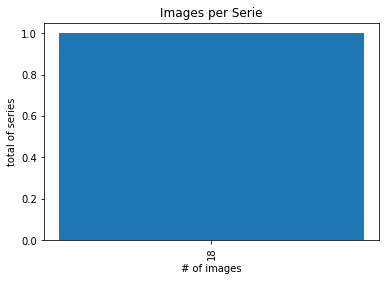

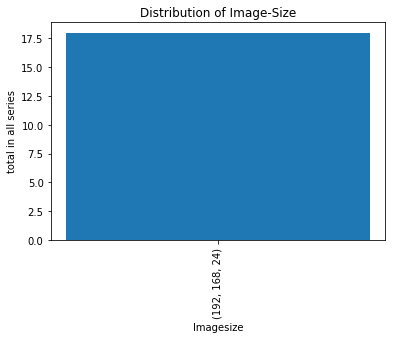

In [103]:
# how to sort on image lvl


